In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from glob import glob
from os import path

In [2]:
df = pd.read_csv(path.join("..", "from_arc", "rad_tib_cv.csv"))
df = df[[
    "label", "version", "fold", 
    "metrics_val_dsc_0_epoch_final", 
    "metrics_val_dsc_1_epoch_final",
    "metrics_val_dsc_2_epoch_final"
]]
df = df.groupby(["label", "version"]).mean().drop(columns=["fold"])
df = df[
    df.groupby(["label"])["metrics_val_dsc_0_epoch_final"].transform(max) 
    == df["metrics_val_dsc_0_epoch_final"]
].dropna()
df = df.reset_index()
df

,label,version,metrics_val_dsc_0_epoch_final,metrics_val_dsc_1_epoch_final,metrics_val_dsc_2_epoch_final
0,segan_3d_cv,20956375,0.952362,0.966265,0.986491
1,segresnetvae_3d_cv,20956391,0.942883,0.954787,0.975282
2,unet_3d_cv,20956405,0.943344,0.955065,0.982037
3,unetpp_3d_cv,20956431,0.951149,0.969514,0.988167
4,unetr_3d_cv,20956455,0.945831,0.956134,0.980496


In [3]:
df["label"] = df["label"].apply(lambda x: x[0:-6])

labels_renaming = {
    "unet": "UNet",
    "unetpp": "UNet++",
    "unetr": "UNETR",
    "segresnetvae": "SegResNetVAE",
    "segan": "SeGAN"
}
df = df.replace({"label": labels_renaming})

df = df.rename(
    columns = {
        "metrics_val_dsc_0_epoch_final": "cort DSC",
        "metrics_val_dsc_1_epoch_final": "trab DSC",
        "metrics_val_dsc_2_epoch_final": "back DSC"
    }
)

In [4]:
df

,label,version,cort DSC,trab DSC,back DSC
0,SeGAN,20956375,0.952362,0.966265,0.986491
1,SegResNetVAE,20956391,0.942883,0.954787,0.975282
2,UNet,20956405,0.943344,0.955065,0.982037
3,UNet++,20956431,0.951149,0.969514,0.988167
4,UNETR,20956455,0.945831,0.956134,0.980496


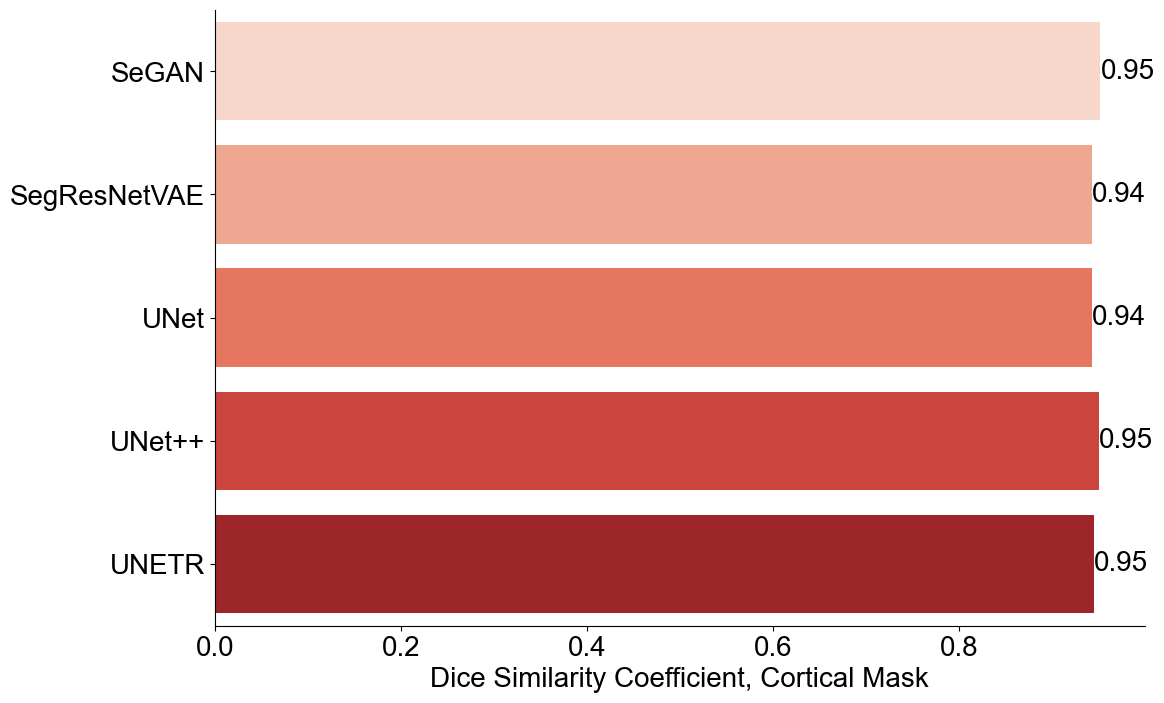

In [5]:
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '1',
      'font.family':'Arial',
      'font.size' : 20}
plt.rcParams.update(rc)


plt.figure(figsize=(12,8))

ax = sns.barplot(data=df, y="label", x="cort DSC", palette="Reds")
# plt.legend(loc="lower left")

ax.set(
    ylabel="",
    xlabel="Dice Similarity Coefficient, Cortical Mask"
)

for i in ax.containers:
    ax.bar_label(i, fmt="%0.2f")

plt.grid(axis="x")
sns.despine()

plt.show()

In [6]:
df = pd.read_csv("/Users/nathanneeteson/Projects/hrpqct-knee-segmentation/from_arc/unet_3d_knee_transfer_cv/21115367_f1/metrics.csv")

In [7]:
df

,train_loss_step,train_dsc_0_step,train_dsc_1_step,train_dsc_2_step,epoch,step,val_loss_step,val_dsc_0_step,val_dsc_1_step,val_dsc_2_step,val_loss_epoch,val_dsc_0_epoch,val_dsc_1_epoch,val_dsc_2_epoch,train_loss_epoch,train_dsc_0_epoch,train_dsc_1_epoch,train_dsc_2_epoch
0,0.629463,0.534301,0.832298,0.858784,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.476749,0.527363,0.890132,0.848391,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.330697,0.549968,0.911649,0.938700,0.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.395953,0.554640,0.888290,0.876769,0.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0,0.238580,0.716178,0.917895,0.948331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,NaN,NaN,NaN,NaN,NaN,1113,0.084623,0.908939,0.975526,0.987648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2879,NaN,NaN,NaN,NaN,NaN,1114,0.081534,0.857573,0.969985,0.993048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2880,NaN,NaN,NaN,NaN,NaN,1115,0.099115,0.893126,0.982842,0.947687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2881,NaN,NaN,NaN,NaN,278.0,3626,NaN,NaN,NaN,NaN,0.086464,0.883394,0.973891,0.985238,NaN,NaN,NaN,NaN


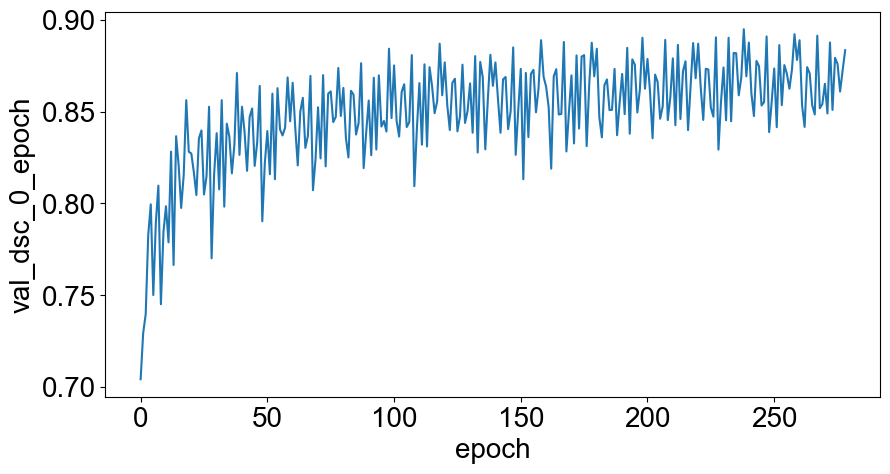

In [21]:
plt.figure()

sns.lineplot(data=df, x="epoch", y="val_dsc_0_epoch")

plt.show()

In [15]:
df["val_dsc_2_epoch"].dropna().iloc[-1]

0.985237717628479